In [1]:
import nibabel as nib
import nilearn.plotting as niplt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
subs=['sub-075', 'sub-131', 'sub-190', 'sub-201', 'sub-235', 'sub-244',
       'sub-249', 'sub-254', 'sub-255', 'sub-256', 'sub-257', 'sub-258',
       'sub-259', 'sub-260', 'sub-261', 'sub-262', 'sub-263', 'sub-264',
       'sub-265', 'sub-266', 'sub-267', 'sub-268', 'sub-269', 'sub-270',
       'sub-271'] 

d='/jukebox/griffiths/bert-brains/'
layers=['layer_'+str(i) for i in range(13)]
results_prefix=d+'results/21st_year/'
results_dirs=[results_prefix+"rsa-activations_"+layer+"/" for layer in layers]+[results_prefix+"rsa-attentions_"+layer+"/" for layer in layers]
layer_names=['activation_layer_'+str(i) for i in range(13)]+['attention_layer_'+str(i) for i in range(13)][:-1]
results_dirs=results_dirs[:-1]
print(len(results_dirs),len(layer_names))

25 25


0.0027445197668708025

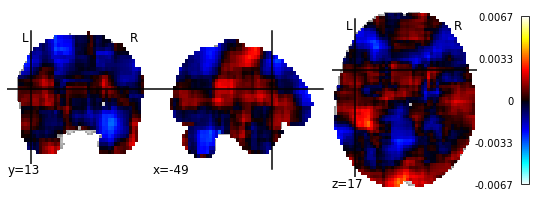

In [7]:
#First Subject
fname=results_dirs[13]+subs[0]+"_whole_brain_anatomical_SL.nii.gz"
niplt.plot_stat_map(fname,cut_coords=(-49,13,17))
x=nib.load(fname).get_fdata()
x[x>=np.percentile(x,99)].mean()

In [7]:
len(fnames)

25

0
1
2
3
4
5
6
7
8
9
10


/usr/people/sreejank/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


11
12
13
14
15
16
17
18
19
20
21
22
23
24


<Figure size 432x288 with 0 Axes>

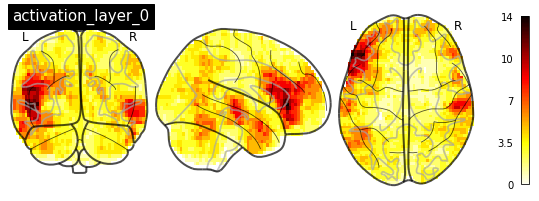

<Figure size 432x288 with 0 Axes>

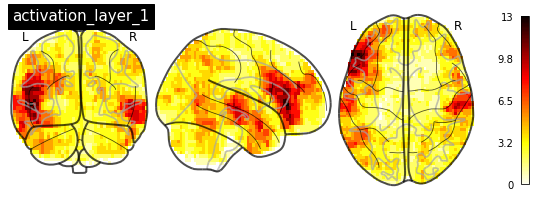

<Figure size 432x288 with 0 Axes>

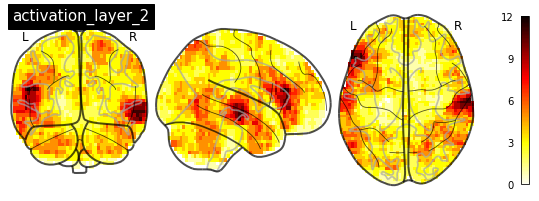

<Figure size 432x288 with 0 Axes>

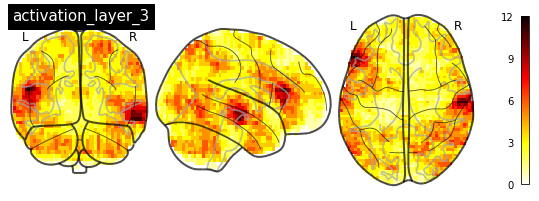

<Figure size 432x288 with 0 Axes>

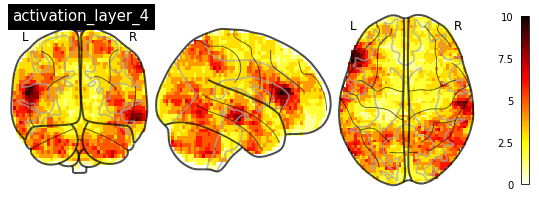

<Figure size 432x288 with 0 Axes>

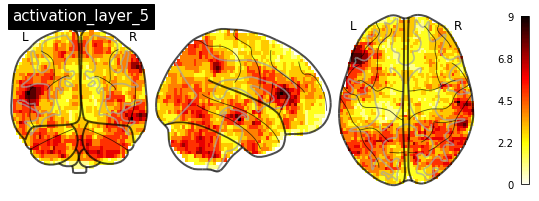

<Figure size 432x288 with 0 Axes>

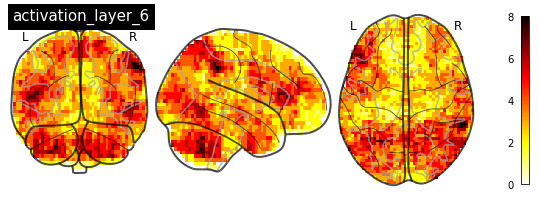

<Figure size 432x288 with 0 Axes>

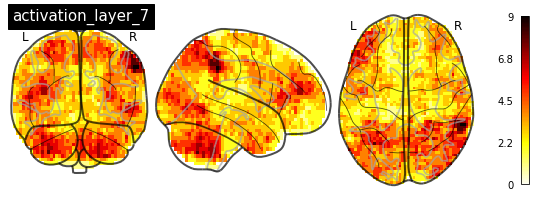

<Figure size 432x288 with 0 Axes>

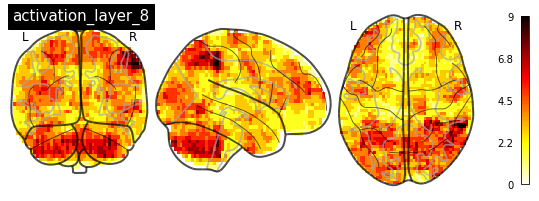

<Figure size 432x288 with 0 Axes>

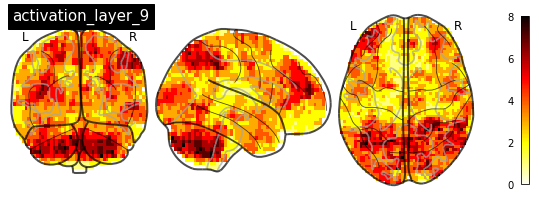

<Figure size 432x288 with 0 Axes>

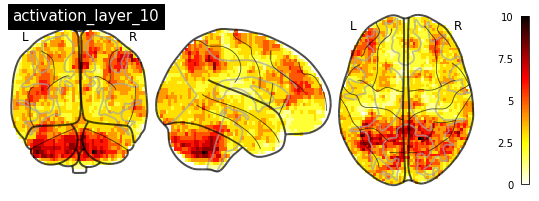

<Figure size 432x288 with 0 Axes>

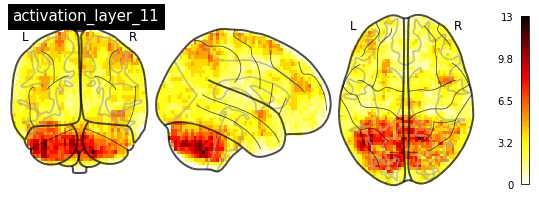

<Figure size 432x288 with 0 Axes>

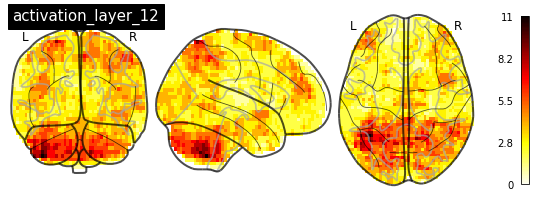

<Figure size 432x288 with 0 Axes>

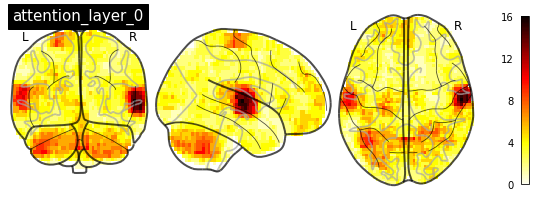

<Figure size 432x288 with 0 Axes>

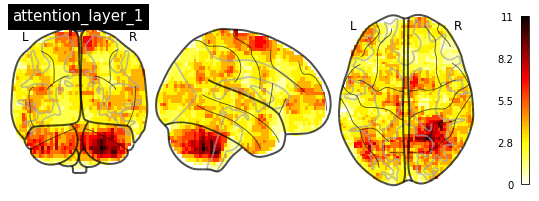

<Figure size 432x288 with 0 Axes>

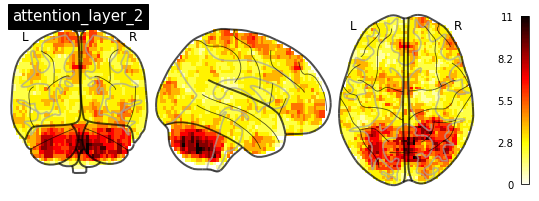

<Figure size 432x288 with 0 Axes>

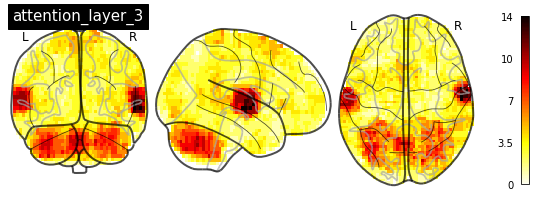

<Figure size 432x288 with 0 Axes>

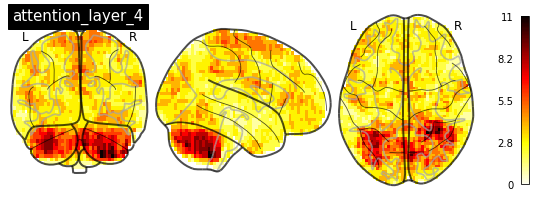

<Figure size 432x288 with 0 Axes>

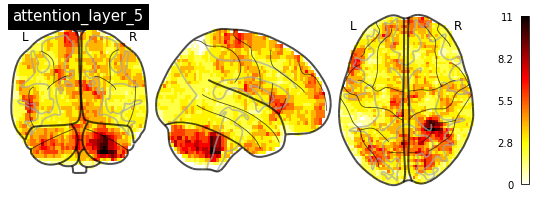

<Figure size 432x288 with 0 Axes>

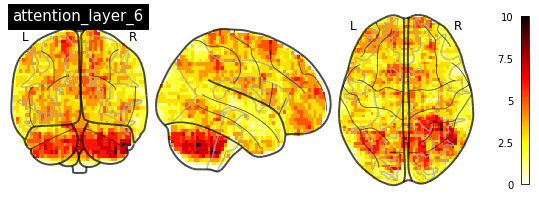

<Figure size 432x288 with 0 Axes>

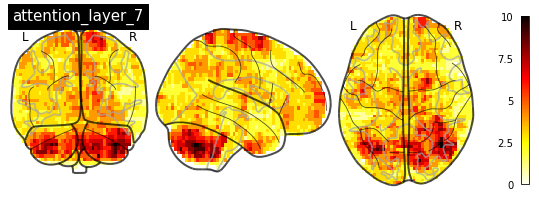

<Figure size 432x288 with 0 Axes>

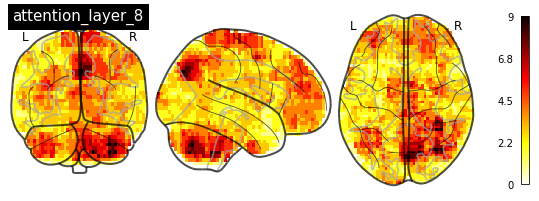

<Figure size 432x288 with 0 Axes>

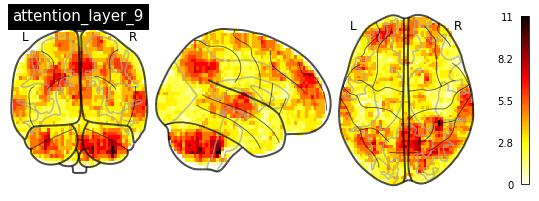

<Figure size 432x288 with 0 Axes>

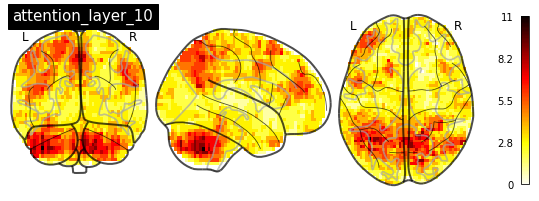

<Figure size 432x288 with 0 Axes>

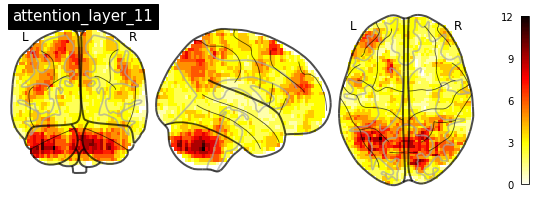

In [6]:
for i in range(25):
    print(i)
    results_dir=results_dirs[i]

    fnames=[results_dir+sub+"_whole_brain_anatomical_SL.nii.gz" for sub in subs]
    mask_nii=nib.load("/jukebox/griffiths/bert-brains/21styear_data/whole_brain_mask.nii.gz")
    affine=mask_nii.affine
    mask=mask_nii.get_fdata().astype('bool')
    volumes=[]
    for fname in fnames:
        nii=nib.load(fname)
        data=nii.get_fdata()
        threshold=np.percentile(data[mask],95)
        volumes.append((data>=threshold))
        affine=nii.affine
    volumes=np.asarray(volumes)
    plt.figure()
    img=nib.Nifti1Image(np.sum(volumes,axis=0),affine)
    niplt.plot_glass_brain(img,title=layer_names[i],colorbar=True)

In [6]:
len(subs)

25

In [ ]:
import nilearn
nilearn.__version__

In [ ]:
import matplotlib
matplotlib.__version__